<a href="https://colab.research.google.com/github/bamacgabhann/PTSA/blob/main/PTSA.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PTSA - Public Transit Service Areas - is a Python package to generate service area polygons around public transit locations (e.g. bus stops, train stations) using several different methods.

This Notebook uses PTSA to generate service areas for bus stops in Limerick and Sligo (Ireland), using several different methods, and evaluate the results.

If you are using Google Colab to run this Notebook, you can run the following cell to connect a Google Drive.

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

If you are using Google Colab to run this Notebook, you will need to run the following cell to install missing packages:

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install osmnx
#    !pip install movingpandas hvplot cartopy geoviews

Import dependencies

In [12]:
import geopandas as gpd
import osmnx as ox

import matplotlib.pyplot as plt

#from shapely.geometry import Point, LineString, Polygon, box

#import pandas as pd
#import movingpandas as mpd


#import hvplot.pandas

#from datetime import datetime, timedelta
#from holoviews import opts

#import warnings
#warnings.filterwarnings("ignore")

#plot_defaults = {"linewidth": 5, "capstyle": "round", "figsize": (10, 6), "legend": True}

Import GeoPackage files defining the area of interest, and the public transit points

In [21]:
area = gpd.read_file('https://github.com/bamacgabhann/PTSA/raw/refs/heads/main/sample_data/sligo_area.gpkg', layer='sligo_area')
area_10m_buffer = gpd.read_file('https://github.com/bamacgabhann/PTSA/raw/refs/heads/main/sample_data/sligo_area.gpkg', layer='sligo_area_10m_buffer')
service_points = gpd.read_file('https://github.com/bamacgabhann/PTSA/raw/refs/heads/main/sample_data/sligo_bus_stops.gpkg')

/home/breandan/.pyenv/versions/PTSA/lib/python3.11/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'sligo_bus_stops.gpkg': 's1_to_cairns_road' (default), 's1_to_cartron', 's2_to_rosses_point', 's2_to_strandhill'. Specify layer parameter to avoid this warning.
  result = read_func(


Use OSMNX to import roads and footways from Open Street Map for the area of interest:

In [15]:
# Extract a polygon from the geopackage, converting to EPSG:4326 for Open Street Map download
area_polygon = area_10m_buffer.to_crs(4326).geometry[0]

# download the national, secondary, and local roads from OpenStreetMap in the area, converting to EPSG:2157 because a projected CRS is required to generate network, cropping them to the map area
area_roads = ox.features_from_polygon(area_polygon, tags={'highway': ['trunk','trunk_link','primary','primary_link','secondary','secondary_link','tertiary','unclassified','residential','service', 'tertiary_link','pedestrian','footway', 'track', 'path', 'steps']})
area_roads = area_roads[area_roads.geom_type == 'LineString'].to_crs(2157).overlay(area_10m_buffer, how='intersection')

N_list = ['trunk','trunk_link','primary','primary_link']
R_list = ['secondary','secondary_link']
L_list = ['tertiary','unclassified','residential','service', 'tertiary_link']
P_list = ['pedestrian','footway' 'track', 'path', 'steps']

N_roads = area_roads[area_roads['highway'].isin(N_list)]
R_roads = area_roads[area_roads['highway'].isin(R_list)]
L_roads = area_roads[area_roads['highway'].isin(L_list)]
P_roads = area_roads[area_roads['highway'].isin(P_list)]

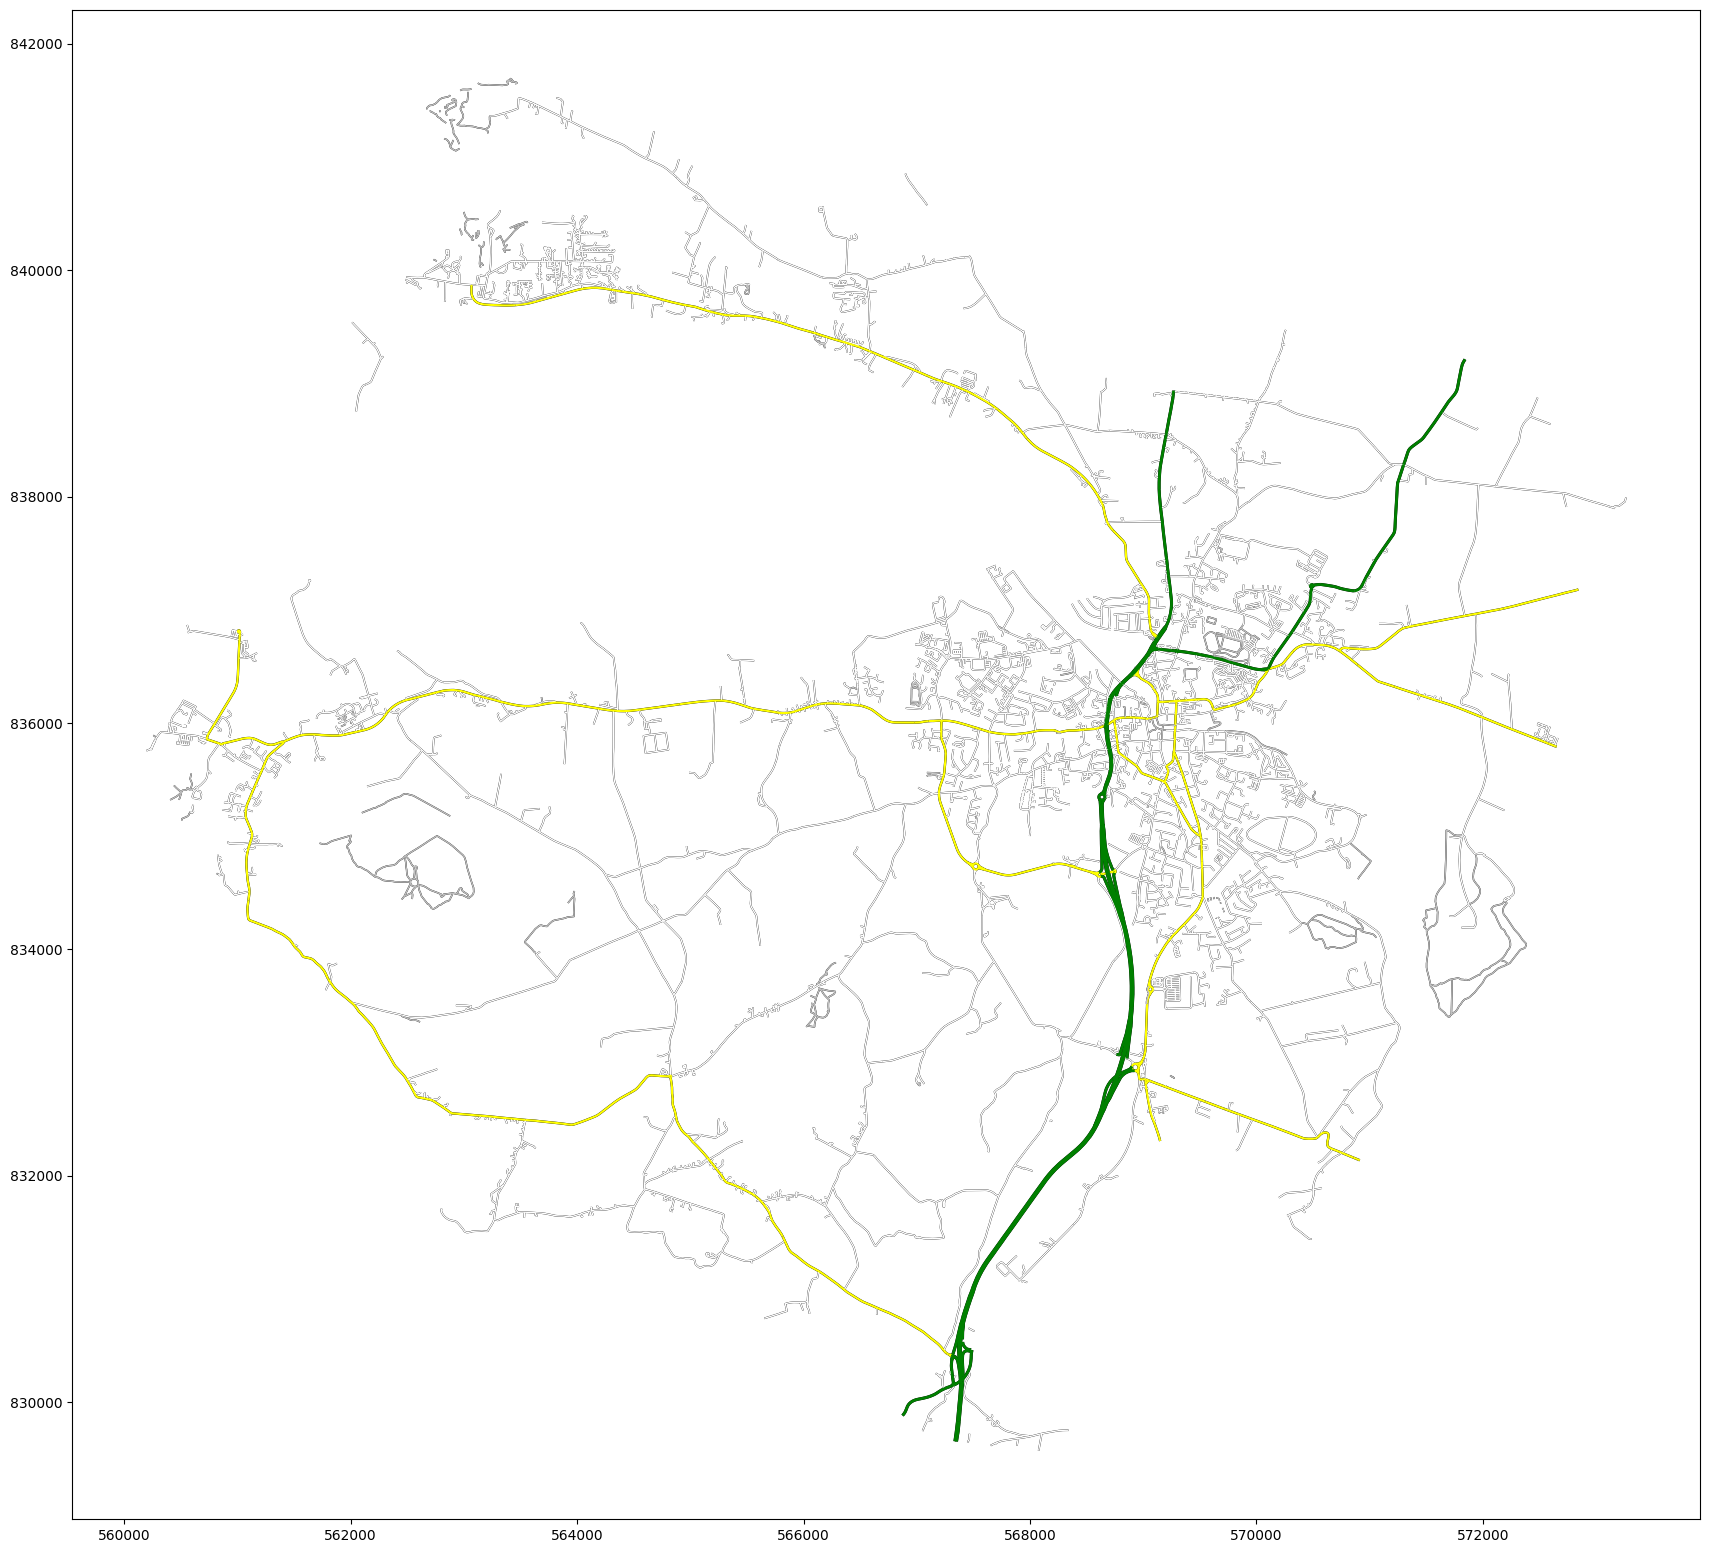

In [19]:
# plot
fig, ax = plt.subplots(figsize=(21, 21))

# plot all roads with a thicker black line which will show as edges,
# and a main line coloured by category
L_roads.plot(ax=ax, color='black', linewidth=1.2)
R_roads.plot(ax=ax, color='black', linewidth=1.7)
N_roads.plot(ax=ax, color='black', linewidth=2.2)
P_roads.plot(ax=ax, color='black', linewidth=1.1)
L_roads.plot(ax=ax, color='white', linewidth=1)
R_roads.plot(ax=ax, color='yellow', linewidth=1.5)
N_roads.plot(ax=ax, color='green', linewidth=2)
P_roads.plot(ax=ax, color='silver', linewidth=1)

plt.show()